In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('test_features.csv')
# y = df['poi']
name = df['name']
df.drop(['name', 'email_address'], axis=1, inplace=True)
df.drop(['loan_advances'], axis=1, inplace=True)
print(df.shape)
df.head(5)

(33, 18)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,5249999.0,2144013.0,-2334434.0,NaN,953136.0,17355.0,484.0,228.0,108.0,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,1350000.0,NaN,-833.0,NaN,NaN,65907.0,27.0,140.0,15.0,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,1500000.0,NaN,-3117011.0,NaN,5538001.0,34039.0,32.0,32.0,21.0,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,3000000.0,NaN,NaN,NaN,2291113.0,86174.0,3069.0,66.0,609.0,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,1000000.0,NaN,-235000.0,NaN,NaN,30674.0,49.0,58.0,12.0,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [28]:
fin_features = ['salary', 'deferral_payments', 'total_payments', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'director_fees',
                'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock']
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 
                  'from_this_person_to_poi', 'shared_receipt_with_poi']

In [29]:
y.value_counts()

False    100
True      13
Name: poi, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bonus                      21 non-null     float64
 1   deferral_payments          11 non-null     float64
 2   deferred_income            15 non-null     float64
 3   director_fees              4 non-null      float64
 4   exercised_stock_options    21 non-null     float64
 5   expenses                   22 non-null     float64
 6   from_messages              21 non-null     float64
 7   from_poi_to_this_person    21 non-null     float64
 8   from_this_person_to_poi    21 non-null     float64
 9   long_term_incentive        17 non-null     float64
 10  other                      24 non-null     float64
 11  restricted_stock           28 non-null     float64
 12  restricted_stock_deferred  8 non-null      float64
 13  salary                     22 non-null     float64
 

In [31]:
df.drop(['deferral_payments', 'deferred_income', 'director_fees', 'restricted_stock_deferred'], axis=1, inplace=True)
df.head(5)

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,5249999.0,953136.0,17355.0,484.0,228.0,108.0,NaN,210698.0,157569.0,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,1350000.0,NaN,65907.0,27.0,140.0,15.0,974293.0,1621.0,252055.0,278601.0,1593.0,1858.0,2669589.0,252055.0
2,1500000.0,5538001.0,34039.0,32.0,32.0,21.0,1617011.0,11350.0,853064.0,243293.0,1035.0,1045.0,288682.0,6391065.0
3,3000000.0,2291113.0,86174.0,3069.0,66.0,609.0,1294981.0,1661.0,1323148.0,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,1000000.0,NaN,30674.0,49.0,58.0,12.0,350000.0,307895.0,2502063.0,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [32]:
fin_ratio_cols = ['bonus', 'expenses', 'other', 'salary']

for col in fin_ratio_cols:
    df[col + '_ratio'] = df[col] / df['total_payments']

df['to_poi_ratio'] = df['from_poi_to_this_person'] / df['to_messages']
df['from_poi_ratio'] = df['from_this_person_to_poi'] / df['from_messages']
df['stock_to_salary'] = df['total_stock_value'] / df['salary']
df2 = df.copy()
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,5249999.0,953136.0,17355.0,484.0,228.0,108.0,NaN,210698.0,157569.0,213999.0,...,7991.0,5501630.0,1110705.0,0.954262,0.003155,0.038297,0.038897,0.028532,0.223140,5.190235
1,1350000.0,NaN,65907.0,27.0,140.0,15.0,974293.0,1621.0,252055.0,278601.0,...,1858.0,2669589.0,252055.0,0.505696,0.024688,0.000607,0.104361,0.075350,0.555556,0.904717
2,1500000.0,5538001.0,34039.0,32.0,32.0,21.0,1617011.0,11350.0,853064.0,243293.0,...,1045.0,288682.0,6391065.0,5.196029,0.117912,0.039317,0.842772,0.030622,0.656250,26.269005
3,3000000.0,2291113.0,86174.0,3069.0,66.0,609.0,1294981.0,1661.0,1323148.0,365163.0,...,3093.0,4747979.0,3614261.0,0.631848,0.018150,0.000350,0.076909,0.021339,0.198436,9.897665
4,1000000.0,NaN,30674.0,49.0,58.0,12.0,350000.0,307895.0,2502063.0,415189.0,...,1892.0,1868758.0,2502063.0,0.535115,0.016414,0.164759,0.222174,0.030655,0.244898,6.026323
5,1700000.0,NaN,98849.0,27.0,40.0,1.0,69223.0,1936.0,441096.0,211788.0,...,1320.0,2081796.0,441096.0,0.816603,0.047483,0.000930,0.101733,0.030303,0.037037,2.082724
6,2000000.0,10433518.0,86987.0,21.0,242.0,6.0,1617011.0,7427621.0,4188667.0,1060932.0,...,3275.0,17252530.0,14622185.0,0.115925,0.005042,0.430524,0.061494,0.073893,0.285714,13.782396
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32460.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,800000.0,765920.0,96268.0,22.0,188.0,11.0,NaN,891.0,315068.0,278601.0,...,865.0,875760.0,1080988.0,0.913492,0.109925,0.001017,0.318125,0.217341,0.500000,3.880058
9,100000.0,4160672.0,8409.0,NaN,NaN,NaN,156250.0,202052.0,201483.0,76399.0,...,NaN,394475.0,4221891.0,0.253501,0.021317,0.512205,0.193673,NaN,NaN,55.261077


In [33]:
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    
    return missing_data
    
miss_ratio_df = na_check(df)
miss_ratio_df

,Missing Ratio
long_term_incentive,48.484848
bonus,36.363636
exercised_stock_options,36.363636
from_poi_ratio,36.363636
to_poi_ratio,36.363636
bonus_ratio,36.363636
to_messages,36.363636
shared_receipt_with_poi,36.363636
from_this_person_to_poi,36.363636
from_poi_to_this_person,36.363636


In [34]:
def groupencoder(df, cols):
    df = abs(df)
    for col in cols:
        per_25 = np.nanpercentile(df[col], 25)
        per_50 = np.nanpercentile(df[col], 50)
        per_75 = np.nanpercentile(df[col], 75)
        
        for index, row in df.iterrows():
            if pd.isnull(row[col]) == False:
                if row[col] > per_50:
                    if row[col] > per_75:
                        df.loc[index, col] = 4
                    else:
                        df.loc[index, col] = 3
                else:
                    if row[col] > per_25:
                        df.loc[index, col] = 2
                    else:
                        df.loc[index, col] = 1
                        
    new_df = df.fillna(0)
    return new_df

In [35]:
discretizing_features = ['long_term_incentive',
 'bonus',
 'bonus_ratio',
 'from_poi_ratio',
 'to_poi_ratio',
 'to_messages',
 'shared_receipt_with_poi',
 'from_this_person_to_poi',
 'from_poi_to_this_person',
 'from_messages',
 'other',
 'other_ratio',
 'stock_to_salary',
 'salary',
 'expenses_ratio',
 'salary_ratio',
 'expenses']
df = groupencoder(df, discretizing_features)
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,4.0,953136.0,1.0,4.0,4.0,4.0,0.0,3.0,157569.0,1.0,...,4.0,5501630.0,1110705.0,4.0,1.0,3.0,1.0,2.0,2.0,2.0
1,3.0,0.0,3.0,2.0,4.0,3.0,3.0,1.0,252055.0,3.0,...,3.0,2669589.0,252055.0,2.0,2.0,1.0,2.0,4.0,4.0,1.0
2,3.0,5538001.0,1.0,3.0,2.0,3.0,4.0,2.0,853064.0,2.0,...,2.0,288682.0,6391065.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0
3,4.0,2291113.0,3.0,4.0,4.0,4.0,4.0,2.0,1323148.0,3.0,...,4.0,4747979.0,3614261.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0
4,2.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,2502063.0,4.0,...,3.0,1868758.0,2502063.0,2.0,1.0,3.0,3.0,3.0,3.0,2.0
5,3.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,441096.0,1.0,...,2.0,2081796.0,441096.0,4.0,3.0,1.0,2.0,3.0,2.0,1.0
6,3.0,10433518.0,3.0,1.0,4.0,2.0,4.0,4.0,4188667.0,4.0,...,4.0,17252530.0,14622185.0,1.0,1.0,4.0,1.0,4.0,3.0,4.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32460.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,765920.0,4.0,1.0,4.0,2.0,0.0,1.0,315068.0,3.0,...,2.0,875760.0,1080988.0,4.0,4.0,1.0,4.0,4.0,4.0,1.0
9,1.0,4160672.0,1.0,0.0,0.0,0.0,1.0,3.0,201483.0,1.0,...,0.0,394475.0,4221891.0,1.0,2.0,4.0,3.0,0.0,0.0,4.0


In [36]:
remain_features = list(df.drop(discretizing_features, axis=1).columns)
df[remain_features] = np.log1p(df[remain_features])
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,4.0,13.767514,1.0,4.0,4.0,4.0,0.0,3.0,11.967625,1.0,...,4.0,15.520555,13.920506,4.0,1.0,3.0,1.0,2.0,2.0,2.0
1,3.0,0.000000,3.0,2.0,4.0,3.0,3.0,1.0,12.437407,3.0,...,3.0,14.797435,12.437407,2.0,2.0,1.0,2.0,4.0,4.0,1.0
2,3.0,15.527144,1.0,3.0,2.0,3.0,4.0,2.0,13.656591,2.0,...,2.0,12.573084,15.670412,4.0,4.0,3.0,4.0,3.0,4.0,4.0
3,4.0,14.644549,3.0,4.0,4.0,4.0,4.0,2.0,14.095525,3.0,...,4.0,15.373230,15.100398,3.0,1.0,1.0,1.0,2.0,2.0,3.0
4,2.0,0.000000,1.0,3.0,3.0,2.0,1.0,3.0,14.732627,4.0,...,3.0,14.440785,14.732627,2.0,1.0,3.0,3.0,3.0,3.0,2.0
5,3.0,0.000000,4.0,2.0,2.0,1.0,1.0,2.0,12.997020,1.0,...,2.0,14.548742,12.997020,4.0,3.0,1.0,2.0,3.0,2.0,1.0
6,3.0,16.160534,3.0,1.0,4.0,2.0,4.0,4.0,15.247893,4.0,...,4.0,16.663469,16.498051,1.0,1.0,4.0,1.0,4.0,3.0,4.0
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.387795,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,13.548834,4.0,1.0,4.0,2.0,0.0,1.0,12.660547,3.0,...,2.0,13.682849,13.893387,4.0,4.0,1.0,4.0,4.0,4.0,1.0
9,1.0,15.241187,1.0,0.0,0.0,0.0,1.0,3.0,12.213465,1.0,...,0.0,12.885314,15.255794,1.0,2.0,4.0,3.0,0.0,0.0,4.0


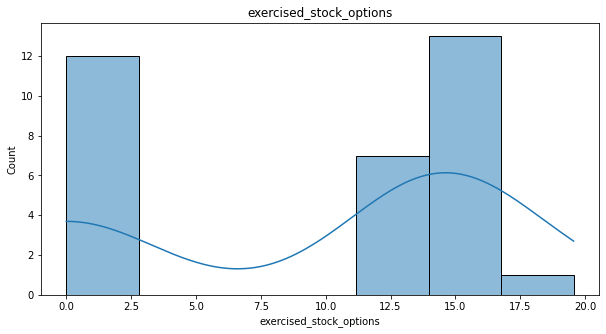

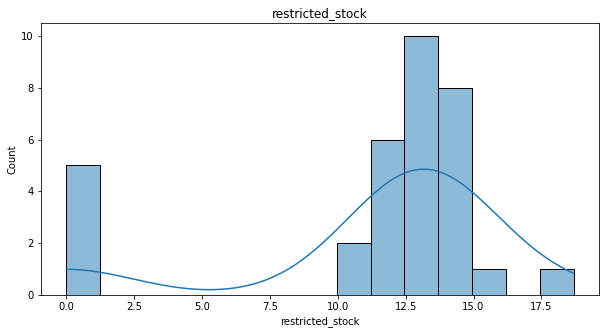

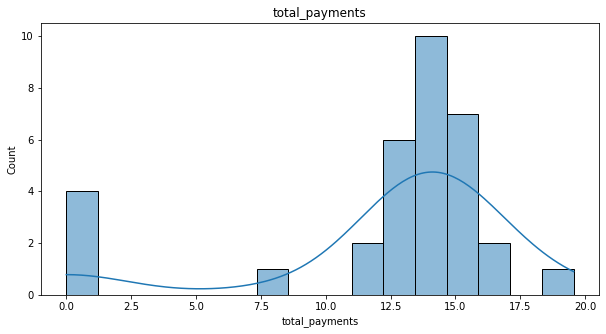

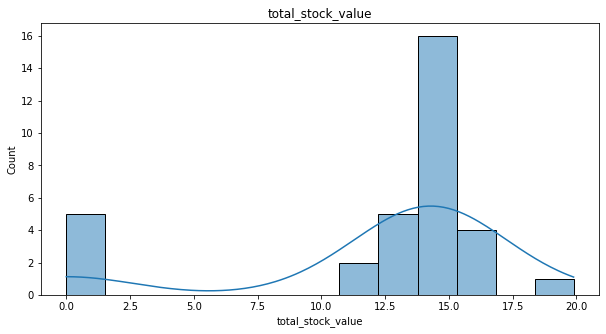

In [37]:
for col in remain_features:
    plt.figure(figsize=(10,5))
    plt.title(col)
    sns.histplot(df[col], kde=True)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
df[df.columns] = MM.fit_transform(df[df.columns])
df

,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,salary,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,1.00,0.703941,0.25,1.00,1.00,1.00,0.00,0.75,0.640476,0.25,...,1.00,0.793821,0.699884,1.00,0.25,0.75,0.25,0.50,0.50,0.50
1,0.75,0.000000,0.75,0.50,1.00,0.75,0.75,0.25,0.665617,0.75,...,0.75,0.756836,0.625318,0.50,0.50,0.25,0.50,1.00,1.00,0.25
2,0.75,0.793912,0.25,0.75,0.50,0.75,1.00,0.50,0.730865,0.50,...,0.50,0.643068,0.787865,1.00,1.00,0.75,1.00,0.75,1.00,1.00
3,1.00,0.748785,0.75,1.00,1.00,1.00,1.00,0.50,0.754355,0.75,...,1.00,0.786285,0.759206,0.75,0.25,0.25,0.25,0.50,0.50,0.75
4,0.50,0.000000,0.25,0.75,0.75,0.50,0.25,0.75,0.788451,1.00,...,0.75,0.738594,0.740715,0.50,0.25,0.75,0.75,0.75,0.75,0.50
5,0.75,0.000000,1.00,0.50,0.50,0.25,0.25,0.50,0.695566,0.25,...,0.50,0.744116,0.653454,1.00,0.75,0.25,0.50,0.75,0.50,0.25
6,0.75,0.826298,0.75,0.25,1.00,0.50,1.00,1.00,0.816027,1.00,...,1.00,0.852277,0.829476,0.25,0.25,1.00,0.25,1.00,0.75,1.00
7,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.555927,0.00,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.50,0.692760,1.00,0.25,1.00,0.50,0.00,0.25,0.677559,0.75,...,0.50,0.699828,0.698521,1.00,1.00,0.25,1.00,1.00,1.00,0.25
9,0.25,0.779291,0.25,0.00,0.00,0.00,0.25,0.75,0.653633,0.25,...,0.00,0.659037,0.767019,0.25,0.50,1.00,0.75,0.00,0.00,1.00


In [39]:
# df.to_csv('丟棄過低、中離散化、高補0+全MM.csv')

In [40]:
# df2 = groupencoder(df, list(df2.columns))
# df2.to_csv('全離群化.csv')

In [41]:
df = pd.concat([name, df], axis=1)
df

,name,bonus,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,other,restricted_stock,...,to_messages,total_payments,total_stock_value,bonus_ratio,expenses_ratio,other_ratio,salary_ratio,to_poi_ratio,from_poi_ratio,stock_to_salary
0,BELDEN TIMOTHY N,1.00,0.703941,0.25,1.00,1.00,1.00,0.00,0.75,0.640476,...,1.00,0.793821,0.699884,1.00,0.25,0.75,0.25,0.50,0.50,0.50
1,BOWEN JR RAYMOND M,0.75,0.000000,0.75,0.50,1.00,0.75,0.75,0.25,0.665617,...,0.75,0.756836,0.625318,0.50,0.50,0.25,0.50,1.00,1.00,0.25
2,HANNON KEVIN P,0.75,0.793912,0.25,0.75,0.50,0.75,1.00,0.50,0.730865,...,0.50,0.643068,0.787865,1.00,1.00,0.75,1.00,0.75,1.00,1.00
3,DELAINEY DAVID W,1.00,0.748785,0.75,1.00,1.00,1.00,1.00,0.50,0.754355,...,1.00,0.786285,0.759206,0.75,0.25,0.25,0.25,0.50,0.50,0.75
4,CAUSEY RICHARD A,0.50,0.000000,0.25,0.75,0.75,0.50,0.25,0.75,0.788451,...,0.75,0.738594,0.740715,0.50,0.25,0.75,0.75,0.75,0.75,0.50
5,HICKERSON GARY J,0.75,0.000000,1.00,0.50,0.50,0.25,0.25,0.50,0.695566,...,0.50,0.744116,0.653454,1.00,0.75,0.25,0.50,0.75,0.50,0.25
6,FREVERT MARK A,0.75,0.826298,0.75,0.25,1.00,0.50,1.00,1.00,0.816027,...,1.00,0.852277,0.829476,0.25,0.25,1.00,0.25,1.00,0.75,1.00
7,CHAN RONNIE,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.555927,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,DONAHUE JR JEFFREY M,0.50,0.692760,1.00,0.25,1.00,0.50,0.00,0.25,0.677559,...,0.50,0.699828,0.698521,1.00,1.00,0.25,1.00,1.00,1.00,0.25
9,REYNOLDS LAWRENCE,0.25,0.779291,0.25,0.00,0.00,0.00,0.25,0.75,0.653633,...,0.00,0.659037,0.767019,0.25,0.50,1.00,0.75,0.00,0.00,1.00


In [44]:
df.to_csv('test_丟棄過低、中離散化、高補0+MM.csv', index=False)